In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('fifa.csv')

In [3]:
fifa_variable_information=pd.read_csv('fifa_variable_information.csv')

In [4]:
fifa_variable_information

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag
5,Overall,overall rating
6,Potential,potential rating
7,Club,current club
8,Club Logo,url to club logo
9,Value,current market value


In [5]:
df.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [7]:
ratings=df[['Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]
df['avg_skill_ratings']=ratings.sum(axis=1)/ratings.shape[1]

In [8]:
df.drop(['Photo', 'Flag', 'Club Logo', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type','Jersey Number','Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],axis=1,inplace=True)

In [9]:
df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,avg_skill_ratings
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,€226.5M,67.588235
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,€127.1M,68.323529
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,€228.1M,65.794118
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,€138.6M,45.264706
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,€196.4M,69.676471


In [10]:
df['Value'] = df['Value'].str.strip("€")
df['Value'] = df['Value'].apply(lambda x: float(x.strip("M"))*(10**6) if 'M' in x else float(x.strip("K"))*(10**3))

In [11]:
df['Wage'] = df['Wage'].str.strip("€")
df['Wage'] = df['Wage'].apply(lambda x: float(x.strip("M"))*(10**6) if 'M' in x else float(x.strip("K"))*(10**3))

In [12]:
df['Joined'] = df['Joined'].str.strip(" ")
df['Joined'] = df['Joined'].str[-4:]
df['Joined']=df['Joined'].astype("Float32").astype("Int32")

In [13]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [14]:
df['Height'] = df['Height'].str.replace("'",'.').astype('Float64')

In [15]:
df['Weight'] = df['Weight'].str.strip("lbs").astype('Float64')

In [16]:
df['Release Clause'] = df['Release Clause'].str.strip("€")
func = lambda x: (float(x.strip("M"))*(10**6) if ('M' in x) else float(x.strip("K"))*(10**3)) if (type(x)!=float) else x
df['Release Clause'] = df['Release Clause'].apply(func)

In [17]:
df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,avg_skill_ratings
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,RF,2004,NaN,2021-01-01,5.70,159.0,226500000.0,67.588235
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,ST,2018,NaN,2022-01-01,6.20,183.0,127100000.0,68.323529
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,LW,2017,NaN,2022-01-01,5.90,150.0,228100000.0,65.794118
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,GK,2011,NaN,2020-01-01,6.40,168.0,138600000.0,45.264706
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,RCM,2015,NaN,2023-01-01,5.11,154.0,196400000.0,69.676471


In [18]:
# df=pd.read_csv('fifa.csv')
# ratings=df[['Crossing', 'Finishing',
#        'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
#        'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
#        'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
#        'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
#        'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
#        'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
#        'GKKicking', 'GKPositioning', 'GKReflexes']]
# df['avg_skill_ratings']=ratings.sum(axis=1)/ratings.shape[1]
# df.drop(['Photo', 'Flag', 'Overall', 'Club Logo','International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
#        'Body Type','Jersey Number','Crossing', 'Finishing',
#        'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
#        'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
#        'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
#        'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
#        'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
#        'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
#        'GKKicking', 'GKPositioning', 'GKReflexes'],axis=1,inplace=True)

In [19]:
missing_values={}
for x in df.columns:
    if df[x].isnull().sum()!=0:
        missing_values[x]=[df[x].isnull().sum(),(df[x].isnull().sum()/df.shape[0])*100]
No_of_missing = pd.DataFrame(missing_values,index=['No_of_missing_values','Pct_of_missing_values']).T
No_of_missing

,No_of_missing_values,Pct_of_missing_values
Club,241.0,1.323667
Preferred Foot,48.0,0.263635
International Reputation,48.0,0.263635
Position,60.0,0.329544
Joined,1553.0,8.529686
Loaned From,16943.0,93.057615
Contract Valid Until,289.0,1.587302
Height,48.0,0.263635
Weight,48.0,0.263635
Release Clause,1564.0,8.590103


Column Loaned From has 93% missing values hence can drop the column

Columns Club,Preferred Foot,Position, Contract Valid Unit has less than 2% of missing data hence can drop the rows

Columns Release Clause, Joined have more than 5% of missing value hence some kind of imputation has to be done

In [20]:
df.drop('Loaned From',axis=1,inplace=True)

In [21]:
for i in No_of_missing[No_of_missing['Pct_of_missing_values']<5].index:
    df.drop(index=df[df[i].isnull()].index,axis=0,inplace=True)

In [22]:
missing_values={}
for x in df.columns:
    if df[x].isnull().sum()!=0:
        missing_values[x]=[df[x].isnull().sum(),(df[x].isnull().sum()/df.shape[0])*100]
No_of_missing = pd.DataFrame(missing_values,index=['No_of_missing_values','Pct_of_missing_values']).T
No_of_missing

,No_of_missing_values,Pct_of_missing_values
Joined,1264.0,7.054359
Release Clause,1275.0,7.115750


In [23]:
df['Joined'].fillna(value=df['Joined'].mode()[0],inplace=True)


In [24]:
df['Release Clause'].fillna(df.groupby(['Club','Joined'])['Release Clause'].transform('mean'),inplace=True)
df.drop(index=df[df['Release Clause'].isnull()].index,axis=0,inplace=True)

1.	Plot the distribution of Overall rating for all players.

<AxesSubplot:ylabel='Density'>

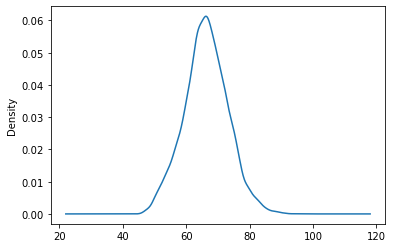

In [25]:
df['Overall'].plot(kind='kde')

2.	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


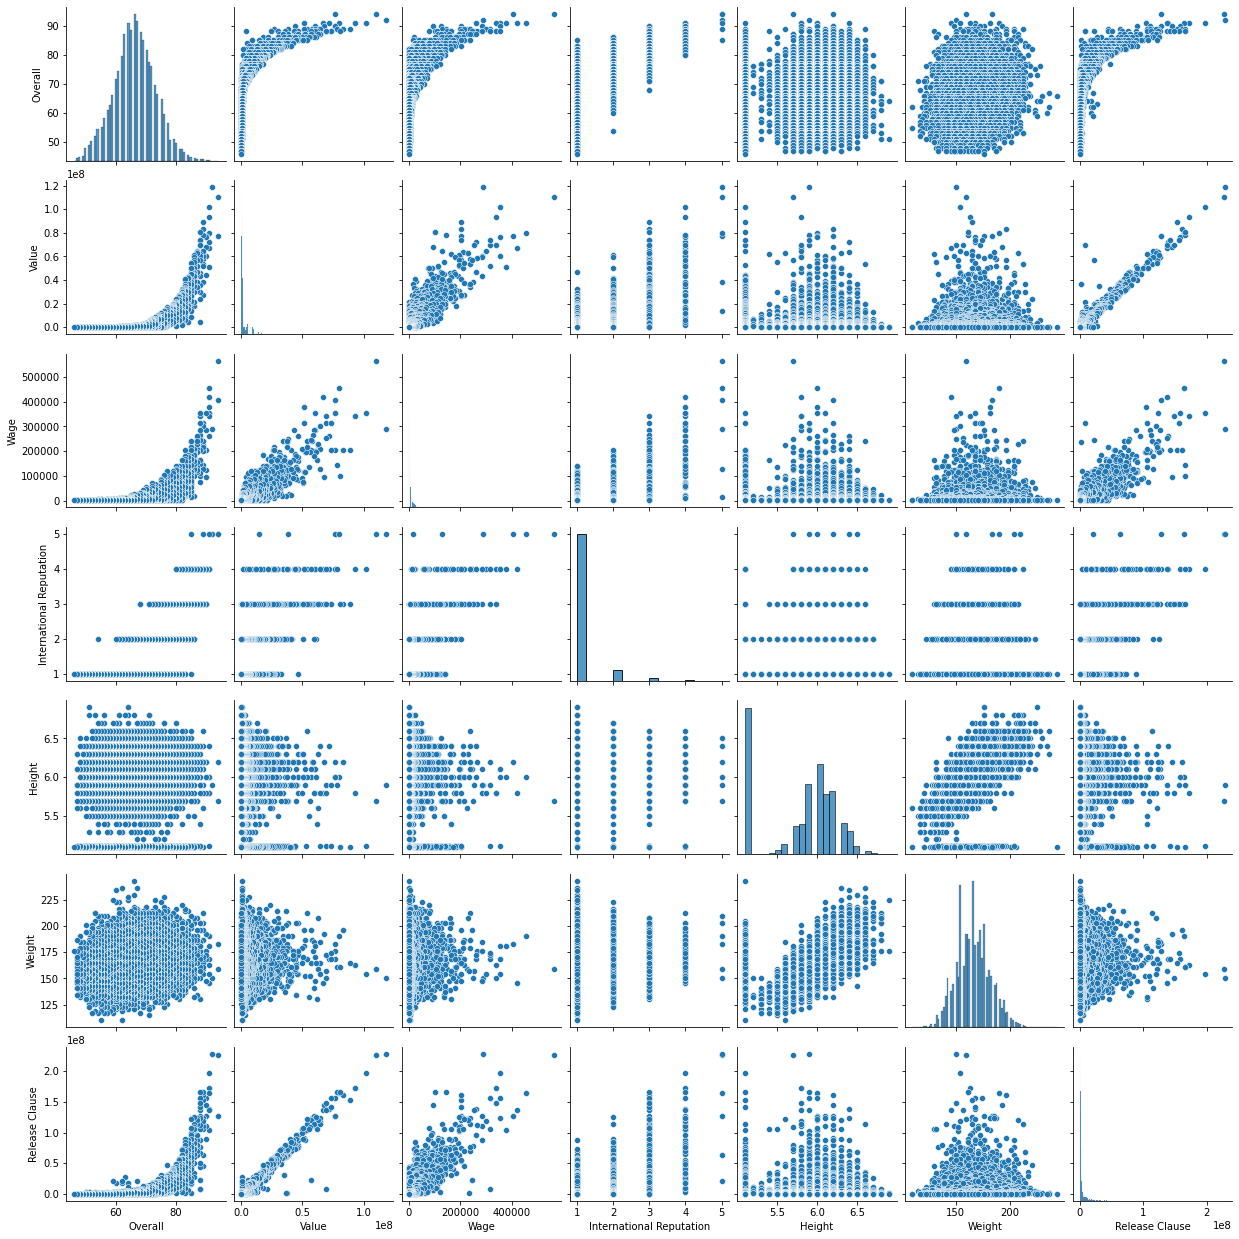

In [26]:
data = df[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']]
sns.pairplot(data)

We can find the Release Clause, Wage, Value has a relation with Overall ratings

Release Clause has a relation with Value

We can also find some relation between Release Clause and Wage

3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

a)	What would the average wage for this set of players be?

b)	What is the average age?

c)	Is there a correlation between the Overall rating and Value for these players?


In [27]:
top_20_players=df[df['Contract Valid Until'].apply(lambda x:x.year)==2020].sort_values(by='Overall',ascending=False).head(20)
top_20_players.head(3)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,avg_skill_ratings
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,GK,2011,2020-01-01,6.4,168.0,138600000.0,45.264706
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,RCM,2012,2020-01-01,5.8,146.0,137400000.0,69.529412
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,RCB,2005,2020-01-01,6.0,181.0,104600000.0,67.147059


In [28]:
print('Average wage for Top 20 players is',top_20_players['Wage'].mean())
print('Average Age for Top 20 players is',top_20_players['Age'].mean())


Average wage for Top 20 players is 205450.0
Average Age for Top 20 players is 30.65


In [29]:
print('correlation between the Overall rating and Value is',df['Overall'].corr(df['Value'],method='spearman'))
print('We have good corelation between Overall rating and Value')

correlation between the Overall rating and Value is 0.9365027839555409
We have good corelation between Overall rating and Value


4.	Generate tables containing the top 5 players by Overall rating for each unique position.

a)	Are there any players appearing in more than one Table. Please point out such players.

b)	What is the average wage one can expect to pay for the top 5 in every position?


In [30]:
top_5_players={}
for i in df['Position'].unique():
    a=df[df['Position']==i]
    a=a.sort_values(by='Overall',ascending=False).head(5)
    top_5_players[i]=a
# len(top_5_players)
# len(top_5_players.keys())

In [31]:
players=[]
for i in df['Position'].unique():
    for j in range(5):
        players.append(top_5_players[i]['Name'].iloc[j])
print('total players in all the sub tables',len(players))
print('total players in all the sub tables after removing the duplicates',len(set(players)))
print('There are no players appearing in more than one Table')

total players in all the sub tables 135
total players in all the sub tables after removing the duplicates 135
There are no players appearing in more than one Table


In [32]:
for i in df['Position'].unique():
    print('Avg Wage expected to be paied for the top 5 players in',i,'position',top_5_players[i]['Wage'].mean())

Avg Wage expected to be paied for the top 5 players in RF position 148000.0
Avg Wage expected to be paied for the top 5 players in ST position 294000.0
Avg Wage expected to be paied for the top 5 players in LW position 261000.0
Avg Wage expected to be paied for the top 5 players in GK position 192800.0
Avg Wage expected to be paied for the top 5 players in RCM position 240800.0
Avg Wage expected to be paied for the top 5 players in LF position 121200.0
Avg Wage expected to be paied for the top 5 players in RS position 132200.0
Avg Wage expected to be paied for the top 5 players in RCB position 231000.0
Avg Wage expected to be paied for the top 5 players in LCM position 184400.0
Avg Wage expected to be paied for the top 5 players in CB position 139600.0
Avg Wage expected to be paied for the top 5 players in LDM position 126600.0
Avg Wage expected to be paied for the top 5 players in CAM position 174000.0
Avg Wage expected to be paied for the top 5 players in CDM position 217000.0
Avg Wa

In [33]:
df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,avg_skill_ratings
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,RF,2004,2021-01-01,5.70,159.0,226500000.0,67.588235
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,ST,2018,2022-01-01,6.20,183.0,127100000.0,68.323529
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,LW,2017,2022-01-01,5.90,150.0,228100000.0,65.794118
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,GK,2011,2020-01-01,6.40,168.0,138600000.0,45.264706
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,RCM,2015,2023-01-01,5.11,154.0,196400000.0,69.676471
